## 使用Matplotlib库进行图表绘制

Matplotlib是一个功能强大的Python绘图和可视化库。在这里，我们主要介绍其中pyplot子库的一些常用功能。

* 安装方式：pip install matplotlib

* 官方主页：https://matplotlib.org/

In [1]:
# 导入pyplot子库
import matplotlib.pyplot as plt

# 如需使用中文，则需要对绘图环境进行设置，选择使用中文字体
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

# 使jupyter notebook能直接显示matplotlib绘制的结果
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


In [2]:
print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/batmanfly/.matplotlib


In [5]:
import numpy as np

# 生成数据
np.random.seed(272)
data_size = 100
# x在1到10间均匀分布
x = np.random.uniform(low=1.0, high=10.0, size=data_size)
# y = x * 20 + 10 + 随机噪声
y = x * 20 + 10 + np.random.normal(loc=0.0, scale=10.0, size=data_size)


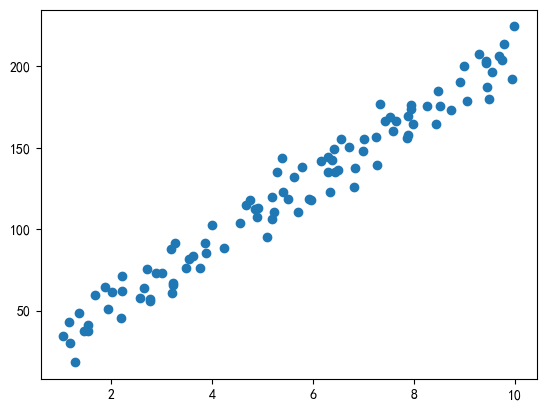

In [7]:
# 绘制散点图
plt.scatter(x, y)
plt.show()

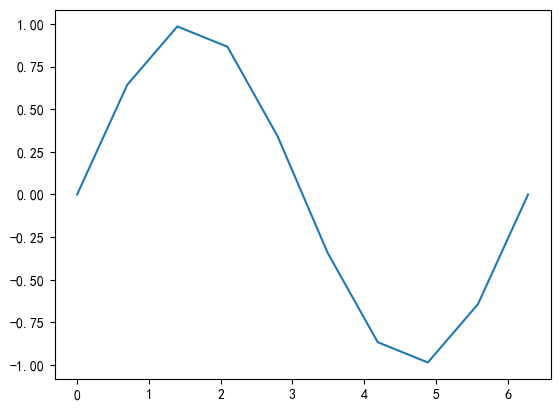

In [9]:
# 绘制折线图
x = np.linspace(0, 2*np.pi, num=10) 
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [11]:
class LinearRegression(object):
    
    def __init__(self, learning_rate=0.01, max_iter=100, seed=None):
        '''
        一元线性回归类的构造函数：
        参数 学习率：learning_rate
        参数 最大迭代次数：max_iter
        参数 seed：产生随机数的种子    
        从正态分布中采样w和b的初始值
        '''
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = np.random.normal(1, 0.1)
        self.b = np.random.normal(1, 0.1)
        self.loss_arr = []
          
    def fit(self, x, y):
        '''
        类的方法：训练函数
        参数 自变量：x 
        参数 因变量：y
        返回每一次迭代后的损失函数
        '''
        for i in range(self.max_iter):
            self.__train_step(x,y)
            y_pred = self.predict(x)
            self.loss_arr.append(self.loss(y, y_pred))
    
    def __f(self, x, w, b):
        '''
        类的方法：计算一元线性回归函数在x处的值
        '''
        return x * w + b
      
    def predict(self, x):
        '''
        类的方法：预测函数
        参数：自变量：x 
        返回：对x的回归值
        '''
        y_pred = self.__f(x, self.w, self.b)
        return y_pred
   
    def loss(self, y_true, y_pred):  
        '''
        类的方法：计算损失
        参数 真实因变量：y_true 
        参数 预测因变量：y_pred   
        返回：MSE损失
        '''
        return np.mean((y_true - y_pred)**2)
    
    def __calc_gradient(self, x, y):
        '''
        类的方法：分别计算对w和b的梯度
        '''
        d_w = np.mean(2* (x * self.w + self.b - y) * x)
        d_b = np.mean(2*(x * self.w + self.b - y))
        return d_w, d_b
   
    def __train_step(self,x,y):
        '''
        类的方法：单步迭代，即一次迭代中对梯度进行更新
        '''
        d_w, d_b = self.__calc_gradient(x,y)
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

def generate_data(data_size, noise_scale=10.0, w=20.0, b=10.0):
    # 生成数据
    np.random.seed(272)
    # x在1到10间均匀分布
    x = np.random.uniform(low=1.0, high=10.0, size=data_size)
    # y = x * 20 + 10 + 随机噪声
    y = x * w + b + np.random.normal(loc=0.0, scale=noise_scale, size=data_size)

    # train / test split
    shuffled_index = np.random.permutation(data_size)
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    
    return x, y, x_train, y_train, x_test, y_test

x, y, x_train, y_train, x_test, y_test = generate_data(100)
# train the liner regression model
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
print('w: \t{:.3}'.format(regr.w))
print('b: \t{:.3}'.format(regr.b))


w: 	21.0
b: 	4.41


In [ ]:
# 绘制数据点
plt.scatter(x, y, marker='.')
# 用蓝线绘制生成数据时的方程
plt.plot(x, x * 20 + 10, 'b')
# 用红线绘制在训练集上拟合得到的直线方程
plt.plot(x, x * regr.w + regr.b, 'r')
plt.show()

In [ ]:
# 生成数据
# 数据集大小为100
x, y, x_train, y_train, x_test, y_test = generate_data(100)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
print(test_error)



plt.hist(test_error, color='r', bins=10)
plt.show()

In [ ]:
# 生成数据
# 数据集大小为1000
x, y, x_train, y_train, x_test, y_test = generate_data(1000)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
plt.hist(test_error, color='r', bins=20)
plt.show()

In [ ]:
# 生成数据
# 数据集大小为10000
x, y, x_train, y_train, x_test, y_test = generate_data(10000)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
plt.hist(test_error, color='r', bins=20)
plt.show()

In [ ]:
# 生成数据
x, y, x_train, y_train, x_test, y_test = generate_data(100, noise_scale=10.0)

# 散点图
plt.scatter(x, y, c='g')
plt.show()

# 二维直方图
plt.hist2d(x, y, cmap='Greens')
plt.show()

In [ ]:
# 生成数据
x, y, x_train, y_train, x_test, y_test = generate_data(100, noise_scale=100.0)

# 散点图
plt.scatter(x, y, c='g')
plt.show()

# 二维直方图
plt.hist2d(x, y, cmap='Greens')
plt.show()

In [ ]:
# 例：绘制z=x^2+y^2
# 给定x和y的范围
x = np.linspace(-1, 1, num=5)
y = np.linspace(-1, 1, num=5)
print(x)
print(y)
# 使用np.meshgrid函数生成一个网格
x, y = np.meshgrid(x, y)
print(x)
print(y)

In [ ]:
# 计算z在网格上每一点的值
z = x**2 + y**2 
print(z)

In [ ]:
plt.contour(x, y, z, cmap="Greens")
plt.show()

In [ ]:
# 用更多的点，使函数更为平滑
x = np.linspace(-1, 1, num=50)
y = np.linspace(-1, 1, num=50)
x, y = np.meshgrid(x, y)
z = x**2 + y**2 
plt.contour(x, y, z, cmap="Greens")
plt.show()

In [ ]:
# 只保留z=0.5一条等高线
plt.contour(x, y, z, [0.5])
plt.show()

# 保留z=[0.33, 0.66]两条等高线
plt.contour(x, y, z, [0.33, 0.66])
plt.show()

In [ ]:
# 绘制多个子图
# 绘图环境的设置
plt.figure(figsize=(8,4)) # 设置画布大小
plt.subplot(321) # 在一个三行两列的绘图区域中选择子区域1开始绘图
plt.plot(range(10), range(10)) # x=0..9, y=0..9

plt.subplot(3, 2, 5) # 在一个三行两列的绘图区域中选择子区域4开始绘图
plt.plot(range(10), range(10,0,-1))

# 直接在画布上按照[左边缘位置，下边缘位置，宽度，高度]选择绘图区域
#plt.axes([0.1, 0.1, 0.3, 0.3]) 
#plt.plot(range(5), range(5))
#plt.show()


In [ ]:
# 保存绘制的图像
x, y, x_train, y_train, x_test, y_test = generate_data(100)
# train the liner regression model
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
# 绘制数据点
plt.scatter(x, y, marker='.')
# 用蓝线绘制生成数据时的方程
plt.plot(x, x * 20 + 10, 'b')
# 用红线绘制在训练集上拟合得到的直线方程
plt.plot(x, x * regr.w + regr.b, 'r')
# 保存为png格式的位图
plt.savefig("results.png")
# 保存为pdf格式的矢量图
plt.savefig("results.pdf")